In [1]:
import image_neighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from imutils import build_montages


File ../00_data/00_test_pic_full/.DS_Store is not readable.
File ../00_data/00_test_pic_full/.DS_Store is not readable.
File ../00_data/00_test_pic_full/.DS_Store is not readable.


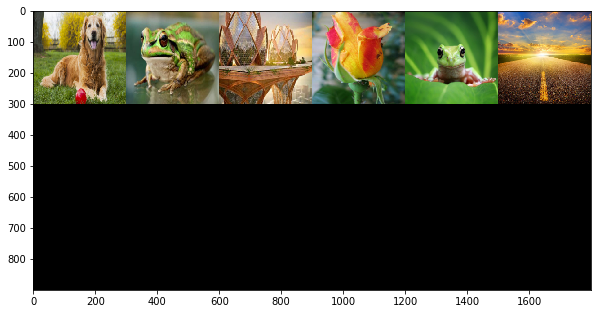

In [2]:
image_neighbors.mix_n_match_neighbors("../00_data/00_test_pic_full", "target_01", 5)

In [3]:
valid_path, features, feature_list = image_neighbors.img_get_feature("../00_data/00_test_pic_full")

File ../00_data/00_test_pic_full/.DS_Store is not readable.
File ../00_data/00_test_pic_full/.DS_Store is not readable.


In [4]:
feature_list 

[[53.9456,
  184.0193,
  139.6262,
  104.00922051944494,
  27.959908221473604,
  51.901640146898686,
  119.75559363524962,
  109.74301101592849],
 [33.3954,
  105.133,
  139.9589,
  43.10774883255165,
  60.06020261825161,
  108.82002296689211,
  110.88615721892299,
  70.5218185614352],
 [55.7401,
  123.4399,
  38.2442,
  17.558230436247342,
  44.01570922508447,
  6.956523110894157,
  13.601672188026612,
  5.225398327821306],
 [76.7345,
  141.2243,
  121.0788,
  64.64567563133436,
  61.43287535768723,
  42.72015188501787,
  41.32064008677342,
  16.933116354777297],
 [80.5466,
  105.4917,
  84.8217,
  33.92760695328749,
  71.68754225236405,
  21.13358456014482,
  22.028069310390798,
  13.214552370244583],
 [0.0,
  0.0,
  28.9088,
  0.0,
  36.204048751965296,
  4.950480272478753,
  4.950480272478753,
  4.950480272478753],
 [39.9203,
  169.9703,
  95.2951,
  106.79324953720543,
  75.3949906350822,
  20.226413751369158,
  26.82387273566364,
  9.402612192605318],
 [11.645,
  1.3054,
  114.94

In [5]:
scaled_feature_list = image_neighbors.scale_feature(feature_list)
scaled_feature_list

array([[ 0.13978303,  1.26460037,  0.33413069,  1.62223603, -1.37041402,
        -0.41978722,  0.47220142,  0.59360737],
       [-0.49348094, -0.03710948,  0.3418313 , -0.21077927,  0.35502793,
         0.37457163,  0.34606437,  0.04417977],
       [ 0.19508138,  0.26497431, -2.01243629, -0.97976985, -0.50738914,
        -1.04704592, -1.03747089, -0.87052103],
       [ 0.84203358,  0.55843627, -0.09516362,  0.43747024,  0.42881128,
        -0.54792502, -0.64326446, -0.70651419],
       [ 0.95950521, -0.03119054, -0.93436303, -0.4870836 ,  0.98001596,
        -0.84918939, -0.91763454, -0.75860546],
       [-1.52257571, -1.77191846, -2.22851155, -1.50823828, -0.92727834,
        -1.07504247, -1.16050417, -0.8743722 ],
       [-0.29241311,  1.03277658, -0.69194786,  1.70602987,  1.17929721,
        -0.86184996, -0.84943083, -0.81200479],
       [-1.16372962, -1.75037794, -0.2372302 , -1.47527236,  1.10261065,
        -0.81225038, -0.89272435, -0.61081776],
       [ 0.42480143,  0.82204777

In [6]:
target_index = image_neighbors.find_target_image(valid_path, target_image = "target_01")

In [7]:
list_of_neighbors = image_neighbors.find_neighbors(valid_path, features, scaled_feature_list, 6, target_index)

In [8]:
list_of_neighbors

[['../00_data/00_test_pic_full/target_01.jpg'],
 ['../00_data/00_test_pic_full/corner.jpg'],
 ['../00_data/00_test_pic_full/airplane.jpg'],
 ['../00_data/00_test_pic_full/image_01125.jpg'],
 ['../00_data/00_test_pic_full/horse.jpg'],
 ['../00_data/00_test_pic_full/frog_2.jpg'],
 ['../00_data/00_test_pic_full/flower.jpg']]

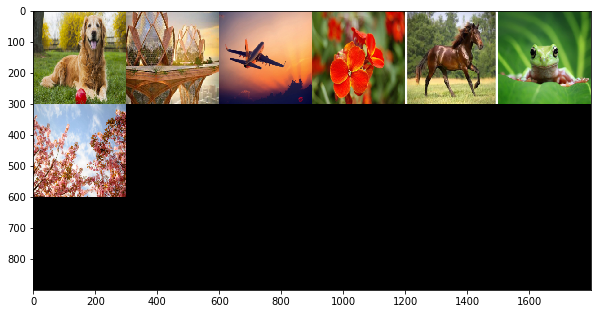

In [9]:
image_neighbors.show_result_in_plot_knn(list_of_neighbors)

In [10]:
def img_resize_plot(img, height = 220, width = 220): # it takes a image (as array) and resize it. 
    
    dim = (width, height)
    list_resize = []
    
    img_res = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
    
    return img_res

def show_result_in_plot_knn(list_of_neighbors):

        images_plot = []
        
        for path in list_of_neighbors:
            img = mpimg.imread(path[0])
            img_res = img_resize_plot(img)
            images_plot.append(img_res)
            
            montages = build_montages(images_plot, (300,300), (6,3))
    
        for montage in montages:
            plt.figure(figsize=(10,10))
            imgplot = plt.imshow(montage)
            plt.show() 
        
        

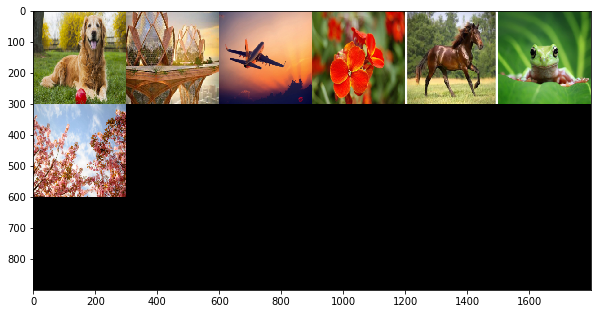

In [11]:
show_result_in_plot_knn(list_of_neighbors)